<center><h1> Virtual Patient Data Analysis Demo</h1> </center>

This Jupyter Notebook will serve as a live, high level demonstration of patient data analysis with virtual electronic medical records (EMR) through the inovative and powerful Jupyter platform. Not only will this notebook introduce the idea of Jupyter Notebooks as a Business Intelligence (BI) tool for data science projects, but also this notebook will serve as a foundation to discuss further data analysis applications. Moreover, this will also provide context for future notebooks that dig deeper into state-of-the-art data science tools. 

The goal of this demonstration is to show that when these open-source data science tools are used in unison, the beneficial applications of such are only limited by our imagination. 

<h2> Outline </h2>
<ol>
<li> Introduce the Idea of Jupyter Notebook as a BI tool for Data Science. </li>
    <ol>
    <li> Notebook Features.</li>
    <li> Jupyter Workflow.</li>
    </ol>
<li> Virtual Patient Data Analysis Demo </li>
    <ol>
    <li> Load data from SQL </li>
    <li> Inspect data </li>
    <li> Clean data / Feature Engineering</li>
    <li> Basic Analysis </li>
        <ol>
        <li> Create and Compare Cohorts </li>
        <li> Visually represent data </li>
        <li> Logistic Regression, Clustering, and Evolutionary Algorithms </li>
        </ol>
    </ol>
<li> Demonstrate interactive widgets </li>
<li> Demonstrate the polymorphic views of notebooks </li>
    <ol>
    <li> Creating reports </li>
    <li> Displaying live code </li>
    <li> Creating dashboards </li>
    </ol>
</ol>
    

<center>


<h2>1) Jupyter Notebook: The BI Tool for Data Science</h2>
</center>
<br/>
The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations, reports, and explanatory text all in one place. Notebooks make it easier than ever to explore hypotheses, prototype, and collaborate on data science projects. 

One of Jupyter's most powerful features is that notebooks are "live". This allows for instant feedback and collaboration with all stakeholders from the programmer to the mathmatician to the business leader. 



<h3> Features: </h3>
<ul>
<li> live code </li>
<li> explantatory text & video </li>
<li> interactive widgets </li>
<li> visualizations </li>
<li> exploration </li>
<li> simulation </li>
<li> modeling </li>
<li> machine learning </li>
<li> production workflow </li>
<li> shareable </li>
<li> browser accessible </li>
<li> FREE! </li>
</ul>

![](jupyter_workflow.png)





<center> <h2> 2) Virtual Patient Data Analysis Demo </h2> </center>

<h3>Import dependencies: </h3>

In [1177]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib import style
style.use('fivethirtyeight')
import time
import datetime
import numpy as np
import seaborn as sns

# Visualisation
import matplotlib as mpl
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

<h3> Load Data </h3>

### SQL

In [ ]:
#import pyodbc

#dsn = 'sqlserverdatasource'
#user = 'SA'
#password = 'SQL73s71ng'
#database = 'testdb'
#con_string = 'DSN=%s;UID=%s;PWD=%s;DATABASE=%s;' % (dsn, user, password, database)

# cnxn and cursor
#cnxn = pyodbc.connect(con_string)
#cursor = cnxn.cursor()

#cursor.execute("SELECT * FROM inventory WHERE quantity > 0;")

#print(cursor.fetchone())

sql = 'select * from table'

data = pandas.read_sql(sql, cnn)

In [1178]:
# Set file paths
patient_file = "/Users/bwi/Documents/VA_Demo/100-patients/PatientCorePopulatedTable.txt"
admissions_file = "/Users/bwi/Documents/VA_Demo/100-patients/AdmissionsCorePopulatedTable.txt"
diagnoses_file = "/Users/bwi/Documents/VA_Demo/100-patients/AdmissionsDiagnosesCorePopulatedTable.txt"
labs_file = "/Users/bwi/Documents/VA_Demo/100-patients/LabsCorePopulatedTable.txt"

# Read files into Dataframes
patients = pd.read_csv(patient_file, sep="\t")
admissions = pd.read_csv(admissions_file, sep="\t")
diagnoses = pd.read_csv(diagnoses_file, sep="\t")
labs = pd.read_csv(labs_file, sep="\t")

# Create Dataframe copies for cleaning
clean_patients = patients
clean_admissions = admissions
clean_diagnoses = diagnoses
clean_labs = labs

### Inspect Data

In [1179]:
patients.head()

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
0,FB2ABB23-C9D0-4D09-8464-49BF0B982F0F,Male,1947-12-28 02:45:40.547,Unknown,Married,Icelandic,18.08
1,64182B95-EB72-4E2B-BE77-8050B71498CE,Male,1952-01-18 19:51:12.917,African American,Separated,English,13.03
2,DB22A4D9-7E4D-485C-916A-9CD1386507FB,Female,1970-07-25 13:04:20.717,Asian,Married,English,6.67
3,6E70D84D-C75F-477C-BC37-9177C3698C66,Male,1979-01-04 05:45:29.580,White,Married,English,16.09
4,C8556CC0-32FC-4CA5-A8CD-9CCF38816167,Female,1921-04-11 11:39:49.197,White,Married,English,18.20


In [1180]:
admissions.head()

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
0,7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,2011-10-12 14:55:02.027,2011-10-22 01:16:07.557
1,DCE5AEB8-6DB9-4106-8AE4-02CCC5C23741,1,1993-02-11 18:57:04.003,1993-02-24 17:22:29.713
2,DCE5AEB8-6DB9-4106-8AE4-02CCC5C23741,2,2002-11-28 19:06:31.117,2002-12-04 19:14:40.797
3,DCE5AEB8-6DB9-4106-8AE4-02CCC5C23741,3,2011-07-19 18:42:45.287,2011-07-25 04:57:42.053
4,886B5885-1EE2-49F3-98D5-A2F02EB8A9D4,1,1994-12-03 22:20:46.077,1994-12-20 20:24:56.010


In [1181]:
diagnoses.head()

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,2,M01.X,Direct infection of joint in infectious and pa...
1,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,3,D65,Disseminated intravascular coagulation [defibr...
2,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,4,C92.1,"Chronic myeloid leukemia, BCR/ABL-positive"
3,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,5,M05.51,Rheumatoid polyneuropathy with rheumatoid arth...
4,6A57AC0C-57F3-4C19-98A1-51135EFBC4FF,1,C91.00,Acute lymphoblastic leukemia not having achiev...


In [1182]:
labs.head()

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
0,1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,URINALYSIS: RED BLOOD CELLS,1.8,rbc/hpf,1992-07-01 01:36:17.910
1,1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: GLUCOSE,103.3,mg/dL,1992-06-30 09:35:52.383
2,1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: MCH,35.8,pg,1992-06-30 03:50:11.777
3,1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: CALCIUM,8.9,mg/dL,1992-06-30 12:09:46.107
4,1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: RED BLOOD CELL COUNT,4.8,m/cumm,1992-07-01 01:31:08.677


### Describe Data

In [1183]:
patients.describe(include= "all")

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
count,100,100,100,100,100,100,100.000000
unique,100,2,100,4,6,4,NaN
top,135C831F-7DA5-46C0-959C-EBCBD8810B43,Female,1944-12-01 06:30:01.543,White,Married,English,NaN
freq,1,52,1,49,45,64,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,22.102500
std,NaN,NaN,NaN,NaN,NaN,NaN,23.327656
min,NaN,NaN,NaN,NaN,NaN,NaN,1.700000
25%,NaN,NaN,NaN,NaN,NaN,NaN,12.702500
50%,NaN,NaN,NaN,NaN,NaN,NaN,15.435000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.687500


In [1184]:
admissions.describe(include = "all")

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
count,372,372.000000,372,372
unique,100,NaN,372,372
top,80D356B4-F974-441F-A5F2-F95986D119A2,NaN,1984-05-31 18:34:12.660,1967-04-28 07:08:18.400
freq,7,NaN,1,1
mean,NaN,2.653226,NaN,NaN
std,NaN,1.476013,NaN,NaN
min,NaN,1.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN
50%,NaN,2.000000,NaN,NaN
75%,NaN,4.000000,NaN,NaN


In [1185]:
diagnoses.describe(include = "all")

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
count,372,372.000000,372,372
unique,100,NaN,349,349
top,25B786AF-0F99-478C-9CFA-0EA607E45834,NaN,Z22.31,Carrier of bacterial disease due to meningococci
freq,7,NaN,3,3
mean,NaN,2.653226,NaN,NaN
std,NaN,1.476013,NaN,NaN
min,NaN,1.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN
50%,NaN,2.000000,NaN,NaN
75%,NaN,4.000000,NaN,NaN


In [1186]:
labs.describe(include = "all")

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
count,111483,111483.000000,111483,111483.000000,111483,111483
unique,100,NaN,35,NaN,14,111483
top,80D356B4-F974-441F-A5F2-F95986D119A2,NaN,CBC: NEUTROPHILS,NaN,k/cumm,1979-05-10 01:39:56.327
freq,2760,NaN,3224,NaN,22257,1
mean,NaN,2.662756,NaN,34.999722,NaN,NaN
std,NaN,1.493165,NaN,58.247715,NaN,NaN
min,NaN,1.000000,NaN,0.000000,NaN,NaN
25%,NaN,1.000000,NaN,3.300000,NaN,NaN
50%,NaN,2.000000,NaN,10.600000,NaN,NaN
75%,NaN,4.000000,NaN,37.900000,NaN,NaN


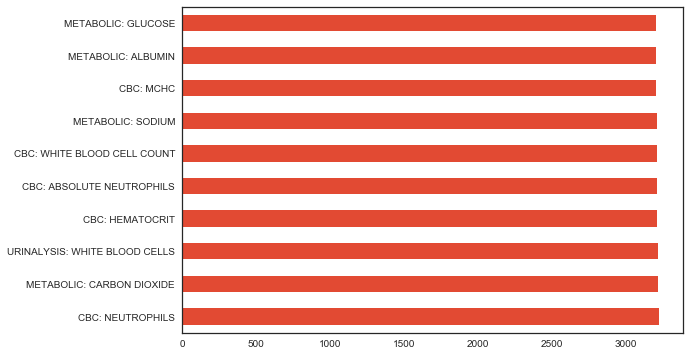

In [1187]:
lab_fig = labs.LabName.value_counts()[:10].plot(kind='barh')

[0, 0] [1, 1]


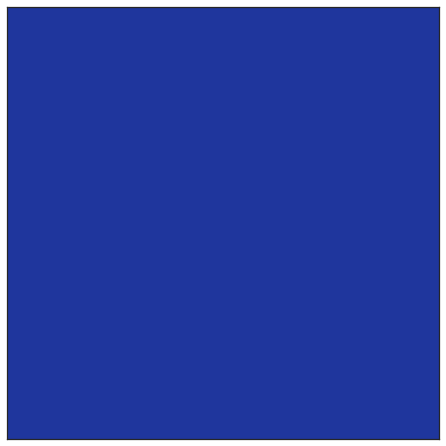

In [1188]:
#import pylab
from matplotlib.patches import Rectangle
from functools import reduce

class Treemap:
    def __init__(self, tree, iter_method, size_method, color_method):
        """create a tree map from tree, using itermethod(node) to walk tree,
        size_method(node) to get object size and color_method(node) to get its 
        color"""

        self.ax = pylab.subplot(111,aspect='equal')
        pylab.subplots_adjust(left=0, right=1, top=1, bottom=0)
        self.ax.set_xticks([])
        self.ax.set_yticks([])

        self.size_method = size_method
        self.iter_method = iter_method
        self.color_method = color_method
        self.addnode(tree)

    def addnode(self, node, lower=[0,0], upper=[1,1], axis=0):
        axis = axis % 2
        self.draw_rectangle(lower, upper, node)
        width = upper[axis] - lower[axis]
        try:
            for child in self.iter_method(node):
                upper[axis] = lower[axis] + (width * float(size(child))) / size(node)
                self.addnode(child, list(lower), list(upper), axis + 1)
                lower[axis] = upper[axis]

        except TypeError:
            pass

    def draw_rectangle(self, lower, upper, node):
        print (lower, upper)
        r = Rectangle( lower, upper[0]-lower[0], upper[1] - lower[1],
                   edgecolor='k',
                   facecolor= self.color_method(node))
        self.ax.add_patch(r)


if __name__ == '__main__':
    # example using nested lists, iter to walk and random colors

    size_cache = {}
    def size(thing):
        if isinstance(thing, int):
            return thing
        if thing in size_cache:
            return size_cache[thing]
        else:
            size_cache[thing] = reduce(int.__add__, [size(x) for x in thing])
            return size_cache[thing]
    import random
    def random_color(thing):
        return (random.random(),random.random(),random.random())

    tree= ()
    #tree= ((100,(1,6)), 50, (5,2,(2,3,(3,2,2)),(3,3)), (3,2) )
    Treemap(tree, iter, size, random_color)
    pylab.show()

##### Helper Functions

In [1189]:
# Feature Maps
gender = {'Male':1, 
         'Female':2}

# For ICDCodes:
#     (A-Z) = (1 - 26)
#     (00-99) remains the same
#     ".xxx" will be dropped for engineer feature

# Age will be calculated by BirthDate minus currentDate

race = {'Unknown': 0,
        'African American': 1,
        'White': 2,
        'Asian': 3}

marital_status = {'Single': 0, 
                  'Married': 1, 
                  'Divorced': 2,
                  'Separated': 3, 
                  'Widowed': 4}

language = {'English': 1,
            'Icelandic': 2,
            'Spanish': 3}

# Length of Stay (LOS) will be engineered from AdmissionEndDate - AdmissionStartDate from admissions

# Lab Names will be engineered into unique index (1-35)
lab_name_int = {}
sorted_lab_names = labs['LabName'].sort_values(inplace=False)
count = 0
for lab in sorted_lab_names:
    if lab not in lab_name_int:
        count = count + 1
        lab_name_int[lab] = count
#print(lab_name_int)
  
# PatientID will be engineered into unique index (1-100)
patient_id_reduced = {}
count = 0
for patient in patients['PatientID']:
    if patient not in patient_id_reduced:
        count = count + 1
        patient_id_reduced[patient] = count
#print(patient_id_reduced)


#Create a new function:
def index_cat(i, m):
    return m[i]
    
#clean_patients.head()
#Applying per column:
#print "Missing values per column:"
#clean_patients.apply(index_cat, axis=0) #axis=0 defines that function is to be applied on each column
clean_patients['PatientID'] = clean_patients['PatientID'].apply(lambda x: index_cat(x, patient_id_reduced))
clean_patients['PatientGender'] = [1 if x == 'Male' else 0 for x in clean_patients['PatientGender'] ]

def calculate_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

clean_patients['Age'] = pd.to_datetime(clean_patients.loc[:,'PatientDateOfBirth'])

clean_patients = clean_patients.drop('PatientDateOfBirth', 1)

clean_patients['Age'] = clean_patients['Age'].apply(lambda x: calculate_age(x))




clean_patients.head(100)
#Applying per row:
#print "\nMissing values per row:"
#print data.apply(num_missing, axis=1).head() #axis=1 defines that function is to be applied on each row




,PatientID,PatientGender,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty,Age
0,1,1,Unknown,Married,Icelandic,18.08,69
1,2,1,African American,Separated,English,13.03,65
2,3,0,Asian,Married,English,6.67,46
3,4,1,White,Married,English,16.09,38
4,5,0,White,Married,English,18.20,96
5,6,1,White,Married,Spanish,12.41,51
6,7,1,Asian,Married,Spanish,12.80,59
7,8,0,White,Married,English,15.31,81
8,9,0,White,Single,English,16.32,84
9,10,0,Unknown,Single,English,11.43,31


In [1190]:
clean_patients = clean_patients.drop('PatientPopulationPercentageBelowPoverty', 1)

clean_patients['PatientRace'] = clean_patients['PatientRace'].apply(lambda x: index_cat(x, race))
clean_patients.head()

,PatientID,PatientGender,PatientRace,PatientMaritalStatus,PatientLanguage,Age
0,1,1,0,Married,Icelandic,69
1,2,1,1,Separated,English,65
2,3,0,3,Married,English,46
3,4,1,2,Married,English,38
4,5,0,2,Married,English,96


In [1191]:
clean_patients['PatientMaritalStatus'] = patients['PatientMaritalStatus'].map(
    {'Single': 0, 'Married': 1, 'Separated': 2, 'Divorced': 3, 'Widowed': 4, 'Unknown': 5})

clean_patients['PatientLanguage'] = patients['PatientLanguage'].map(
    {'English': 0, 'Icelandic': 1, 'Spanish': 2, 'Unknown': 3})
#clean_patients['PatientMaritalStatus'] = clean_patients['PatientMaritalStatus'].apply(lambda x: index_cat(x, marital_status))
#clean_patients['PatientLanguage'] = clean_patients['PatientLanguage'].apply(lambda x: index_cat(x, language))

clean_patients.head(100)


,PatientID,PatientGender,PatientRace,PatientMaritalStatus,PatientLanguage,Age
0,1,1,0,1,1,69
1,2,1,1,2,0,65
2,3,0,3,1,0,46
3,4,1,2,1,0,38
4,5,0,2,1,0,96
5,6,1,2,1,2,51
6,7,1,3,1,2,59
7,8,0,2,1,0,81
8,9,0,2,0,0,84
9,10,0,0,0,0,31


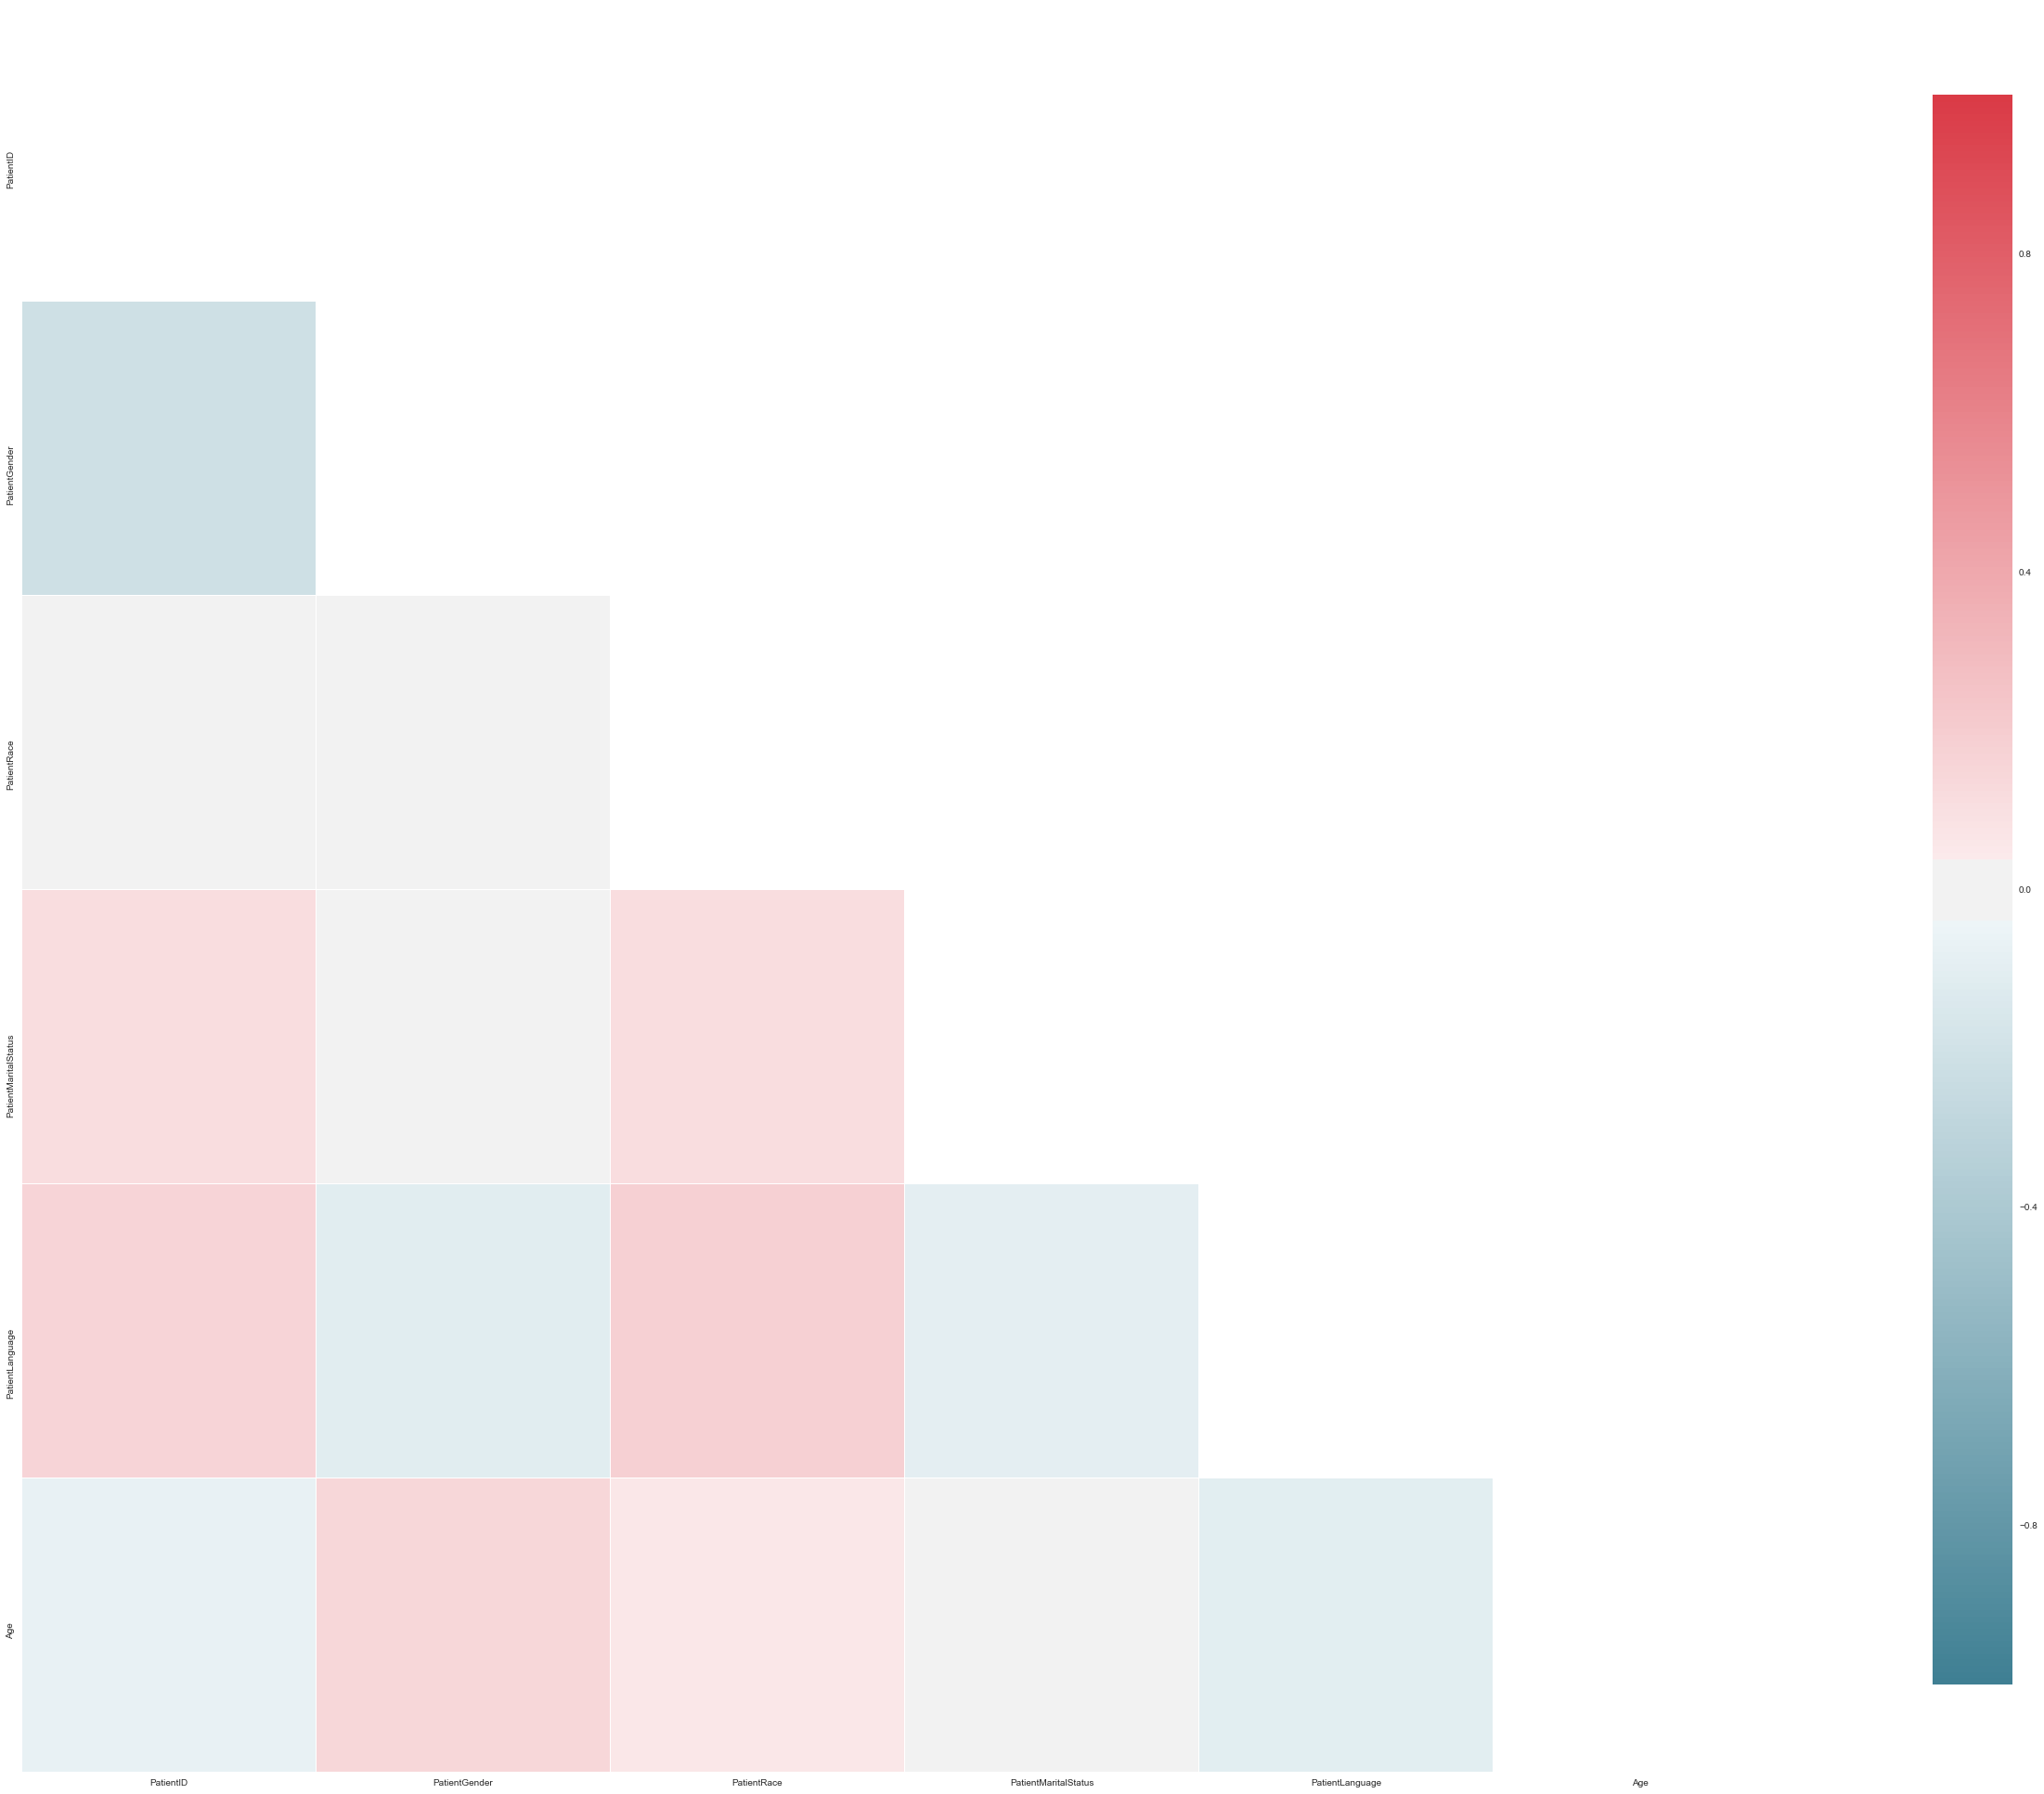

In [1192]:
def plot_correlation_map( df ):
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    _ , ax = plt.subplots( figsize =( 50 , 35 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        mask=mask,
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        #annot = True, 
        #annot_kws = { 'fontsize' : 12 }
        #vmax=.8 sets side bar range
        linewidths=.5
    )

plot_correlation_map( clean_patients )

In [1193]:
def mutate(x):
    return(x+1)

x = 0
mutate(x)
print(x)

0


### Cleaning ICD10 Codes to represent categories of disease

In [1194]:
# Engineering new feature: Disease Category (String)
ICDCodes = diagnoses["PrimaryDiagnosisCode"]

In [1195]:
# Dictionary to hold:
#     key: 'ICD10 category'  
#     value: 'Disease Category (String)'

code_dict = {}
icd_codes = []

In [1196]:
ICDCodes.head()

0     M01.X
1       D65
2     C92.1
3    M05.51
4    C91.00
Name: PrimaryDiagnosisCode, dtype: object

In [1197]:
# Parse out sub ICD category
ICDCodes = pd.DataFrame([code[0:3] for code in ICDCodes])
sortedICD = ICDCodes.sort_values(0)
ICDCodes.head()
print(sortedICD)

       0
111  A42
252  A48
32   A52
309  A83
188  A98
82   B08
321  B33
163  B40
131  B73
145  B95
30   B95
93   B96
48   B97
47   B97
162  C02
226  C03
31   C05
152  C10
253  C11
104  C15
341  C16
338  C18
284  C18
95   C18
279  C18
92   C19
127  C21
170  C31
8    C33
215  C34
..   ...
330  O9A
247  O9A
236  Q24
142  Q60
196  Q60
172  Q61
276  S35
248  S37
360  T43
35   T43
13   T43
351  T46
174  T46
103  T46
186  T82
229  Z12
157  Z12
272  Z12
298  Z12
38   Z13
40   Z13
54   Z13
141  Z13
218  Z13
64   Z22
364  Z22
88   Z22
332  Z49
135  Z91
299  Z95

[372 rows x 1 columns]


In [1198]:


# Add ICDCodes (sub-category) to diagnoses DF and evaluate
diagnoses["ICDCodes"] = ICDCodes
diagnoses.head()

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,ICDCodes
0,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,2,M01.X,Direct infection of joint in infectious and pa...,M01
1,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,3,D65,Disseminated intravascular coagulation [defibr...,D65
2,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,4,C92.1,"Chronic myeloid leukemia, BCR/ABL-positive",C92
3,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,5,M05.51,Rheumatoid polyneuropathy with rheumatoid arth...,M05
4,6A57AC0C-57F3-4C19-98A1-51135EFBC4FF,1,C91.00,Acute lymphoblastic leukemia not having achiev...,C91


In [1199]:
patient_diags = diagnoses
patient_diags = patient_diags.drop(['AdmissionID','PrimaryDiagnosisCode','PrimaryDiagnosisDescription'], 1)
patient_diags['PatientID'] = admissions['PatientID'].apply(lambda x: index_cat(x, patient_id_reduced))
patient_diags.head()

,PatientID,ICDCodes
0,68,M01
1,69,D65
2,69,C92
3,69,M05
4,70,C91


In [1200]:
ICDCodes.head()

# Push unique ICDCodes into icd_codes list
for x in ICDCodes[0]:
    if x not in icd_codes:
        icd_codes.append(x)
del icd_codes[0]
#print(icd_codes)
#temp = ["M05", "M01"]

# Create ICD columns in patients
for code in sortedICD[0]:
    clean_patients[code] = 0
    
#for d in diagnoses:
        
#clean_patients[co



icd_i = {}

'''
for row in clean_patients.iterrows():
    for code in icd_codes:
        print(code)
        print (clean_patients.columns.get_loc(code))
        index = clean_patients.columns.get_loc(code)
        print (row[index])
        if row[index] in patient_dict[row[0]]:
            row[index] = 1
        else:
            row[index] = 0


'''

patient_dict = {k: g["ICDCodes"].tolist() for k,g in patient_diags.groupby("PatientID")}
print(patient_dict)


for key in patient_dict:
    for e in patient_dict[key]:
        clean_patients.set_value(key - 1, e, 1)
        
#code = "M05"
#print(clean_patients.columns.get_loc(code))


{1: ['M12', 'M12', 'E79'], 2: ['A42', 'M63', 'M72', 'J14', 'M12'], 3: ['O9A', 'C71', 'E10', 'C75'], 4: ['F25', 'M11', 'H26', 'D14'], 5: ['F52', 'F01', 'C91', 'C21'], 6: ['G47', 'M10', 'F34', 'B73'], 7: ['G96', 'C91', 'H36', 'Z91'], 8: ['M05', 'D15', 'C94', 'I25', 'C92'], 9: ['Z13', 'Q60', 'O26', 'M05', 'B95'], 10: ['G30'], 11: ['M90', 'H30', 'J66', 'E11', 'N18'], 12: ['C10', 'D41', 'C88', 'C49', 'E09'], 13: ['Z12', 'H47'], 14: ['M05', 'E75', 'M05'], 15: ['C02', 'B40'], 16: ['E09', 'E11'], 17: ['H34', 'K50', 'D68', 'J66', 'C31'], 18: ['M05', 'Q61', 'M24'], 19: ['T46', 'F33', 'M90', 'K57', 'H43', 'F31', 'O99'], 20: ['E11', 'I25'], 21: ['O24', 'F13', 'I79', 'T82'], 22: ['D12', 'A98', 'F14', 'M05', 'M06', 'M05'], 23: ['H75', 'C91', 'H16'], 24: ['Q60', 'O9A', 'I25', 'E10', 'H42', 'N25', 'H61'], 25: ['O99', 'H47', 'M02', 'O99'], 26: ['D39', 'E08', 'M10'], 27: ['D48', 'M11'], 28: ['I25', 'M63', 'E72', 'C34'], 29: ['H16', 'O24', 'Z13'], 30: ['M90', 'I79', 'M24', 'O99'], 31: ['M05'], 32: ['E11'

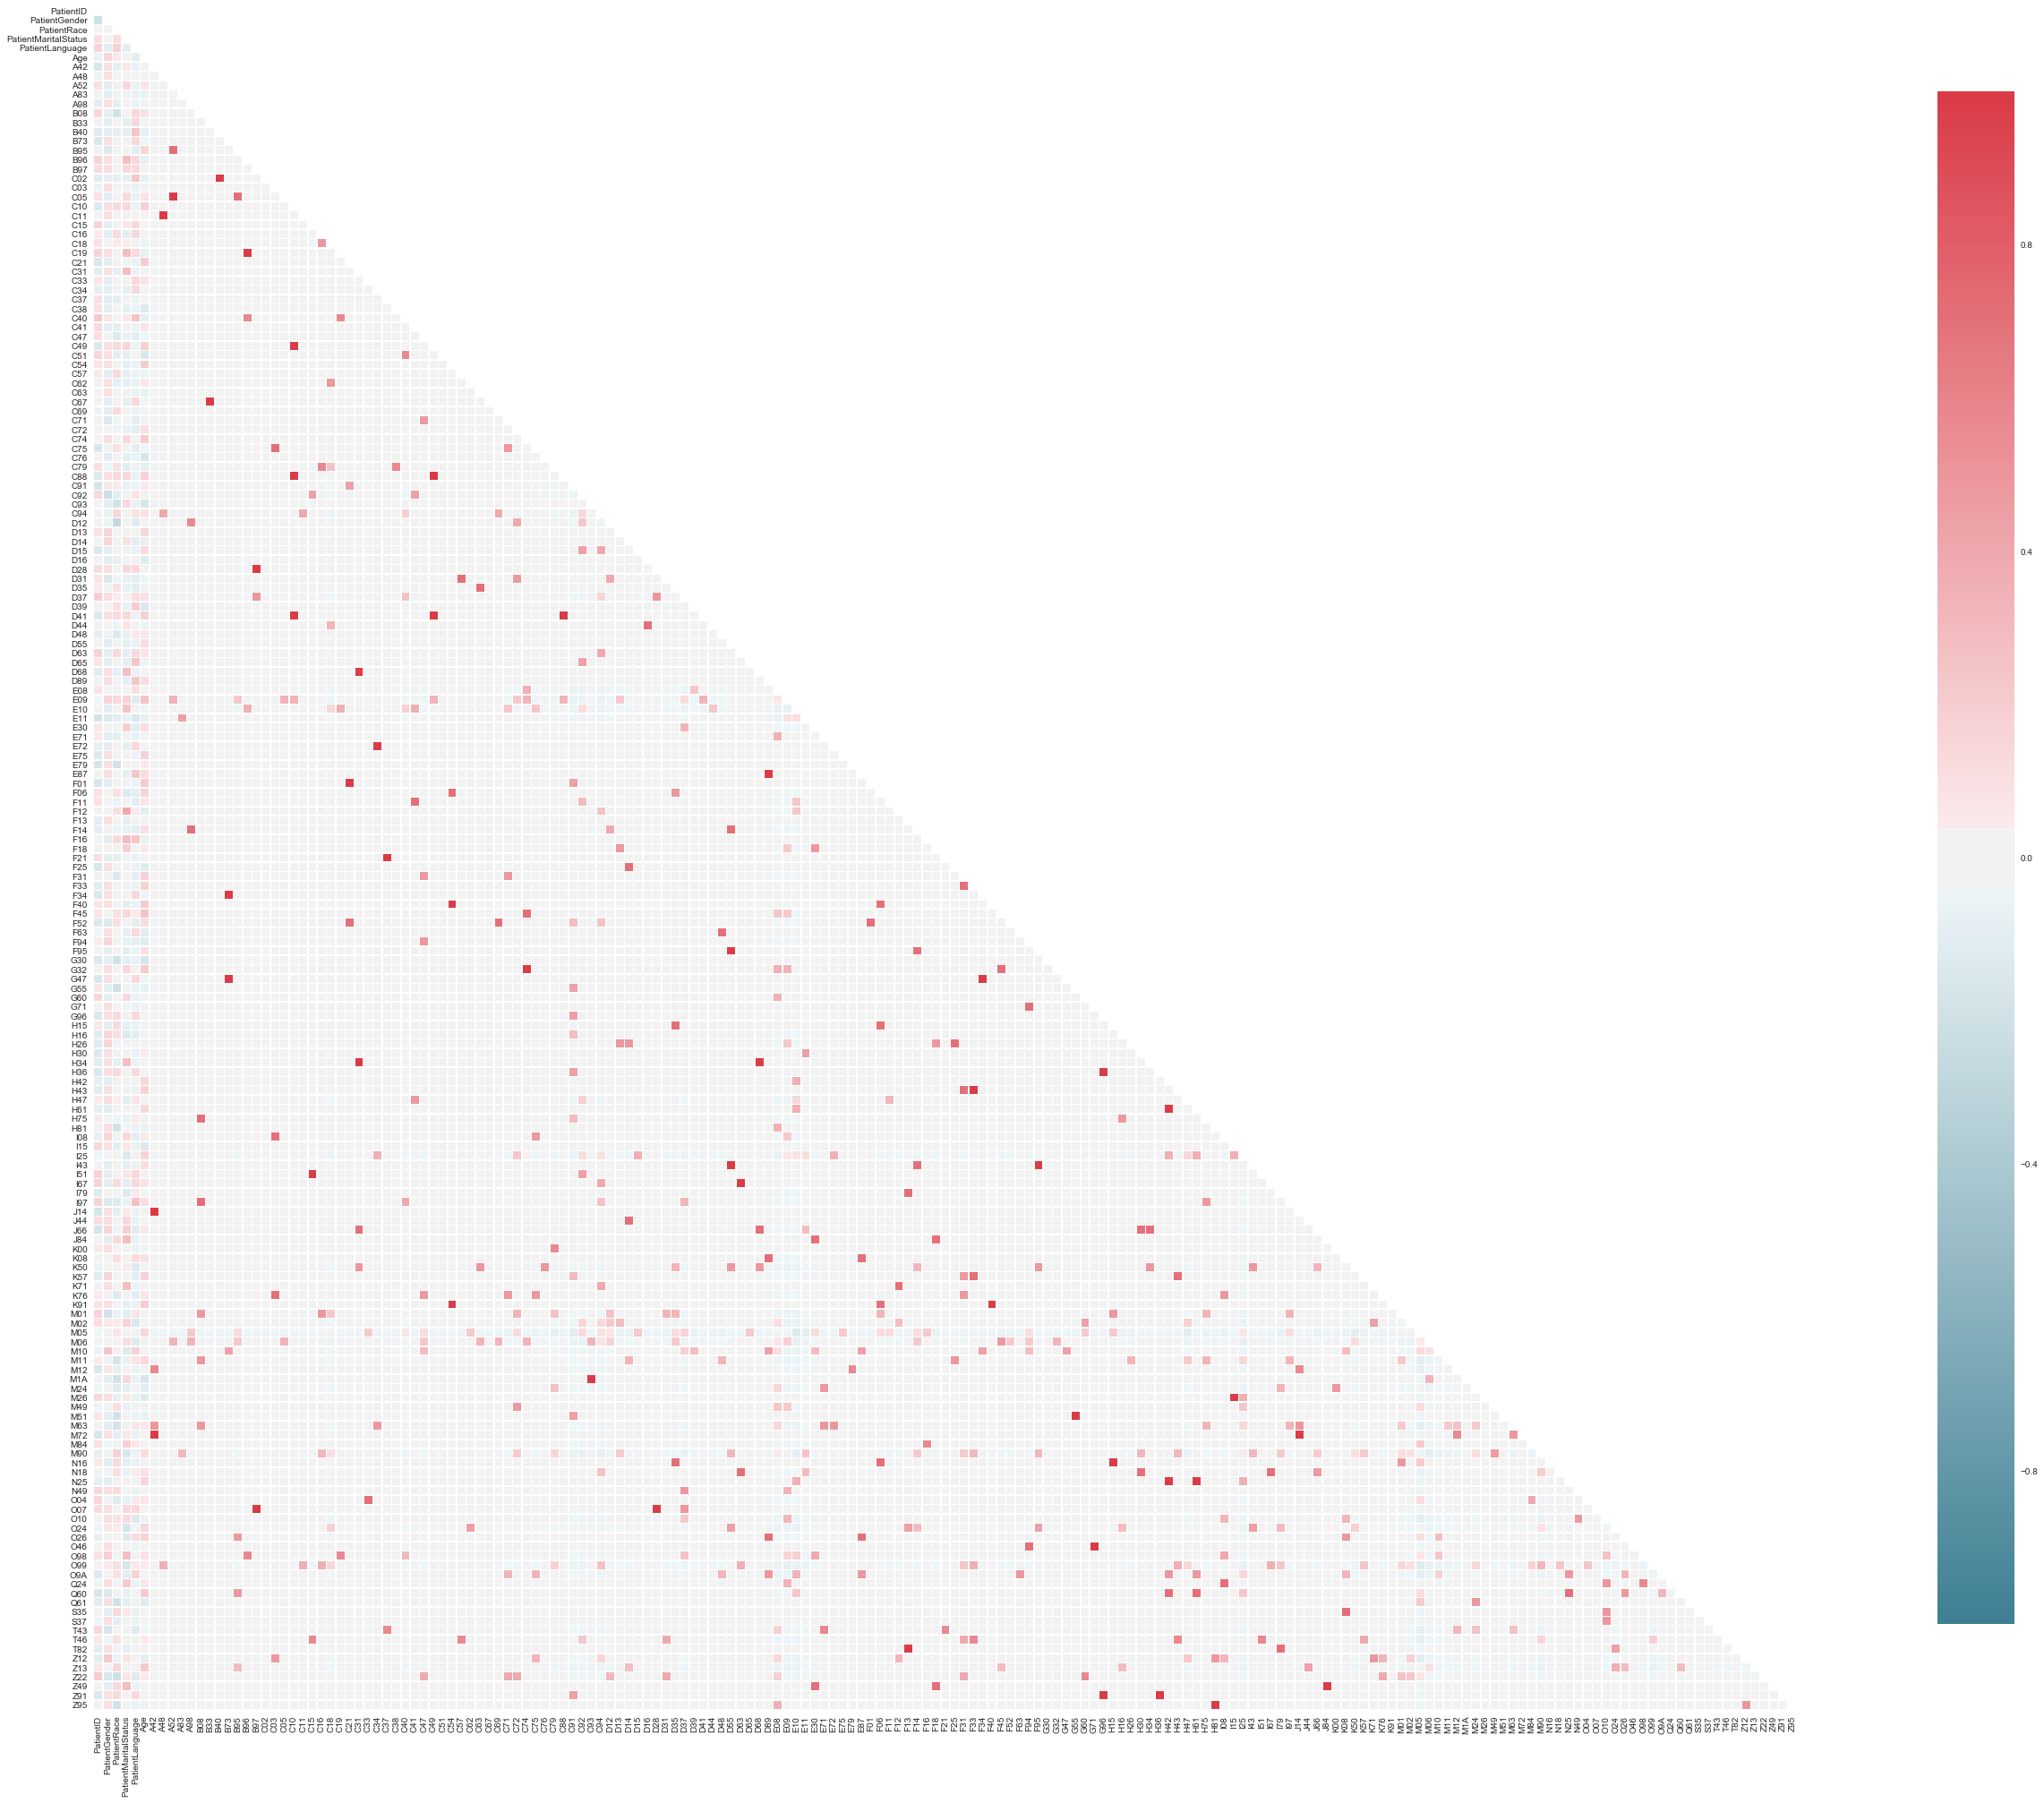

In [1201]:
clean_patients.head(100)
plot_correlation_map( clean_patients )

In [1202]:
#for index, row in df.iterrows():
#print row['Date']



#df = pd.DataFrame.from_dict(patient_dict, orient='index')
#df = df.transpose()

#df.head()


In [1203]:
# Cleaning diagnoses
clean_diagnoses['PatientID'] = clean_diagnoses['PatientID'].apply(lambda x: index_cat(x, patient_id_reduced))
clean_diagnoses = clean_diagnoses.set_index('PatientID')
#clean_diagnoses = clean_diagnoses.drop('PrimaryDiagnosisDescription')
clean_diagnoses.groupby('PatientID').head()

KeyError: 'PatientID'

In [ ]:
diagnoses.describe(include='all')

In [ ]:
diagnoses_fig = diagnoses.ICDCodes.value_counts()[:20].plot(kind='barh')

### <center> Interestingly, MO5 (Rheumatoid arthritis) is the most frequent disease with 23% of the cohort being affected. </center>
### Create M05 Cohort

In [ ]:
# Categorize cohorts by ICDCodes 
#ICDCodes_cohorts = {}

# Create a cohort of all M05 Patients
M05_cohort_patient_ids = diagnoses.loc[(diagnoses['ICDCodes'] == 'M05'), 'PatientID'];
#M05_cohort.describe()

In [ ]:
# Combine demographics with M05 cohort
M05_cohort_patients = patients[patients['PatientID'].isin(M05_cohort_patient_ids)]
#print(M05_cohort_patients)
M05_cohort_patients.describe(include='all')

In [ ]:
M05_cohort_lab_results =  labs[labs['PatientID'].isin(M05_cohort_patient_ids)]
#M05_cohort_lab_results.head()
#print(M05_cohort_lab_results)
M05_cohort_lab_results.describe(include='all')

In [ ]:
fig = M05_cohort_lab_results.LabName.value_counts()[:10].plot(kind='barh')

In [ ]:
M05_cohort_hematocrit_results = M05_cohort_lab_results.loc[(M05_cohort_lab_results['LabName'] == 'CBC: HEMATOCRIT')]
M05_cohort_hematocrit_results.head()
#dates = [pd.to_datetime(ts) for ts in M05_cohort_lab_results['LabDateTime']]
#datenums = md.date2num(dates)

#plt.plot(dates,M05_cohort_lab_results.LabValue.LabName == 'CBC: HEMATOCRIT' )

In [ ]:
M05_h = M05_cohort_hematocrit_results[['PatientID', 'LabValue', 'LabDateTime']]

M05_h['TimeStamps'] = pd.to_datetime(M05_h.loc[:,'LabDateTime'])



M05_h['TimeStamps']
M05_h = M05_h[['PatientID', 'LabValue','TimeStamps']]
M05_h.head()

# Change TimeStamps to integers
M05_h['date_delta'] = (M05_h['TimeStamps'] - M05_h['TimeStamps'].min())  / np.timedelta64(1,'M')

fig, ax = plt.subplots(1,1)
x = 'date_delta'
y = 'LabValue'
M05_h.groupby('PatientID').plot(x, y, figsize=(30,10), ax=ax, alpha=0.4, color="k")
plt.legend().remove()
plt.ylabel('Lab Values (%)')
plt.xlabel('Date:Time')
plt.title('Patient CBC: HEMATOCRIT Results Over Time')


#fit = np.polyfit(x2,y2,1)
#fit_fn = np.poly1d(fit)
#plt.plot(x2,y2,'yo', x2, fit_fn(xz0), '--k', linewidth=5)
#plt.show()

from scipy.stats import linregress
def fit_line1(x, y):
    """Return slope, intercept of best fit line."""
    # Remove entries where either x or y is NaN.
    clean_data = pd.concat([x, y], 1).dropna(0) # row-wise
    (_, x), (_, y) = clean_data.iteritems()
    slope, intercept, r, p, stderr = linregress(x, y)
    return slope, intercept # could also return stderr

import statsmodels.api as sm
def fit_line2(x, y):
    """Return slope, intercept of best fit line."""
    X = sm.add_constant(x)
    model = sm.OLS(y, X, missing='drop') # ignores entires where x or y is NaN
    fit = model.fit()
    return fit.params[1], fit.params[0] # could also return stderr in each via fit.bse


x2 = M05_h['date_delta']
y2 = M05_h['LabValue']
m, b = fit_line2(x2, y2)
N = 100 # could be just 2 if you are only drawing a straight line...
points = np.linspace(x2.min(), x2.max(), N)
plt.plot(points, m*points + b, linewidth=10, color="r", alpha=.3)







In [ ]:
M05_a = M05_h[['PatientID', 'LabValue', 'date_delta']]
#M05_a = M05_a.groupby('PatientID')
#M05_a.head()

#fig2, ax2 = plt.subplots(1,1)
#x3 = 'date_delta'
#y3 = 'LabValue'
#M05_a.groupby('PatientID').plot(x3, y3, figsize=(10,5), ax=ax2, alpha=0.4)
#plt.legend().remove()
#plt.show()

## Average Lab Value

In [ ]:
sns.pairplot(M05_a, x_vars=['date_delta'], y_vars='LabValue', size=7, aspect=0.7, kind='reg')

## From the box plot, it appears that Lab Values below 35 and above 50 could be considered "at risk"

In [ ]:
ax5 = sns.boxplot(x='LabValue', y='PatientID', data=M05_a)
#ax5 = sns.swarmplot(x='LabValue', y='PatientID', data=M05_a)

## At Risk M05 Patients

In [ ]:
M05_h['at_risk'] = [1 if x > 50 or x < 35 else 0 for x in M05_h['LabValue'] ]
M05_h.head()
M05_h.describe(include='all')

## Creating a database of each patient and their historical lab values so we can make predictions

In [ ]:
#M05_a = M05_h.pivot(index='PatientID', columns='date_delta', values='LabValue')
#print(M05_a)
#M05_a.head()
#print(M05_a)
#M05_a.describe(include="all")
M05_database = []
M05_patients = []



for index, row in M05_a.iterrows():
    patientID = row['PatientID']
    if (patientID not in M05_patients):
        M05_patients.append(patientID)
        M05_database.append(
                M05_a[M05_a['PatientID'] == patientID]
        ) 
M05_db_len = len(M05_database) # Number of patients

print(M05_database)
#M05_m = M05_a[['LabValue','date_delta']]
#M05_m = M05_m.transpose()
#M05_m.head()

In [ ]:
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

M05_database[0]['date_delta'].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
#norm = pd.Series((M05_database[0]['date_delta'] - M05_database[0]['date_delta'].min()) / (M05_database[0]['date_delta'].max() - M05_database[0]['date_delta'].min()))
#M05_database[0].loc['normalized_date_delta'] = norm

feature_cols = ['date_delta']
X = M05_database[0][feature_cols]


y = M05_database[0]['LabValue'] 


# SVM Classifier
#clf = svm.SVC()

# Create Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# clf.fit(X_train, y_train) 

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

#X_test.apply(pd.to_numeric)
#y_pred = clf.predict(X_test)
y_pred = linreg.predict(X_test.apply(pd.to_numeric))



#y_pred = linreg.predict(X_test)

x = M05_database[0]['date_delta'].iloc[0] - 1;
x_norm_pred = ( x - M05_database[0]['date_delta'].mean() ) / (M05_database[0]['date_delta'].max() - M05_database[0]['date_delta'].min())
# Next Lab Value prediction 30 days from last test. 
print(x_norm_pred)
next_pred = linreg.predict(x_norm_pred)
print(next_pred)

print(y_pred)


In [ ]:

#feature_cols = ['date_delta']
#X = M05_a[feature_cols]
#X.head()


#X.head()

## Predictions for each patient

In [ ]:
#M05_database = []
#M05_patients = []
#from sklearn import svm
#from sklearn.cross_validation import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn import metrics

# Create Linear Regression Model and 30 day lab value prediction for each patient. 

for patient in M05_database:

    feature_cols = ['date_delta']
    #X = M05_database[0][feature_cols] ORIGINAL
    X = patient[feature_cols] #CHANGE
    #y = M05_database[0]['LabValue'] ORIGINAL
    y = patient['LabValue'] # CHANGE

    # SVM Classifier
    #clf = svm.SVC()
    
    # Create Training and Test Sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    # clf.fit(X_train, y_train) 

    # Linear Regression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    #X_test.apply(pd.to_numeric)
    #y_pred = clf.predict(X_test)
    y_pred = linreg.predict(X_test.apply(pd.to_numeric))

     

    #y_pred = linreg.predict(X_test)

    

    # Next Lab Value prediction 30 days from last test. 
    next_pred = linreg.predict(patient['date_delta'].iloc[0] - 1)
    print("Patient: ", patient['PatientID'].iloc[0])# Potentially shows if LabValue is increasing or decreasing over time?
    
    # Print cooefficient for correlation
    print("Date Coefficient: ", list(zip(feature_cols, linreg.coef_)))
    
    # Print error value
    print("Error: ", np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
    
    #print("30 day: ", patient['date_delta'].iloc[-1] + 30, )
    print("Lab Value Prediction: ", next_pred)
    if next_pred < 35 or next_pred > 50:
        print("This patient is at risk!")
    print('\n')
    #patient.set_value('FutureLabTest',0, next_pred)
    
# Wrap everything in a function and create a list of all patient's 30 day prediction!

#### One patient ( 'EEAFC0B3-B835-4D99-AB33-2F9428E54E5F' ) is predicted to be at-risk in the next 30 days with a lab value of less than 35.

In [ ]:
M05_database[0].corr()

In [ ]:
#list(zip(feature_cols, linreg.coef_))

In [ ]:
#y_pred = linreg.predict(X_test)

In [ ]:
#from sklearn import metrics
#print(np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

In [ ]:
#print(y_pred[0:5])
#print(y_test[0:5])

In [ ]:
next_pred = linreg.predict(M05_database[0]['date_delta'].iloc[-1] + 30)
print(next_pred)
#M05_a['FutureLabTest'] = 
# Wrap everything in a function and create a list of all patient's 30 day prediction!

In [ ]:
M05_a.describe()

In [ ]:
# Create M90 Cohort (Second most frequent disease)
M90_cohort_patient_ids = diagnoses.loc[(diagnoses['ICDCodes'] == 'M90'), 'PatientID'];

# Collect M90 Cohort Demographic Information
M90_cohort_patients = patients[patients['PatientID'].isin(M05_cohort_patient_ids)]

# Collect M90 Cohort Lab Results
M90_cohort_lab_results =  labs[labs['PatientID'].isin(M05_cohort_patient_ids)]

M90_lab_fig = M90_cohort_lab_results.LabName.value_counts()[:10].plot(kind='barh')

M90_cohort_lab_results.head()



In [ ]:
M90_cohort_lab_results.plot()
fig(figsize=(1,1))

In [1204]:
import ipywidgets as widgets
from IPython.display import display


In [1205]:
caption = widgets.Label(value='Enter ICD Code or Disease: ')
text = widgets.Text()
display(caption, text)
cohort = pd.DataFrame
def handle_submit(sender):
    print(text.value)
    if len(text.value) > 3:
        cohort = create_cohort(labNames = [text.value])
    else:
        cohort = create_cohort([text.value])
    print(cohort.head())
    
text.on_submit(handle_submit)

def on_value_change(change):
    print(change['new'])
    cohort = create_cohort([text.value])
    print(cohort.head())
    



In [1225]:
def create_cohort (diseases = None, labNames = None):
    if diseases == None and labNames == None:
        return None
    elif labNames == None:
        #print("This is called")
        #print("diseases: ", diseases)
        cohort = diseases;
        print("This is the type: ", type(cohort))
        print("This is the cohort: ", cohort)
        # Create Cohort - This will create a list of series of PatientIDS who have specified disease
        cohort_patient_ids = [ diagnoses.loc[(diagnoses['ICDCodes'] == x), 'PatientID'] for x in cohort ]
        
        # Append each series from the list into one series 
        series = pd.Series()
        for s in cohort_patient_ids:
            series = series.append(s, ignore_index=True)
        series = series.drop_duplicates() 
        #return(series)
    
        # Collect Demograpic Info
        #cohort_patients = clean_patients[clean_patients['PatientID'].isin(series)]
        
        # Collect Comorbidities
        #cohort_patients = diagnoses[diagnoses['PatientID'].isin(series)]
        
    
        # Collect Lab Results
        cohort_patients = labs[labs['PatientID'].isin(series)]
        
        return(cohort_patients)
    
    
        #--------------------------
        # DEVELOPING
        #--------------------------
    elif diseases == None:
        # Collect Cohort Lab Results
       
        #cohort_lab_results =  labs[labs['PatientID'].isin(cohort_patients)]
        cohort_lab_results =  labs[labs['LabName'].isin(labNames)]
        return(cohort_lab_results);
        
        #print(cohort_patient_ids)
       
        #print(cohort_patient_ids[0])
        
        #print(type(cohort_patient_ids))
        #print(type(cohort_patient_ids[0]))
        #pd.concat([s1, s2], axis=1)
        
            #print(type(s))
            #print(s)
        #series = [ series.append(s,ignore_index=True) for s in cohort_patient_ids ]
        #print(type(series))
        #print(series)
        
        #print(df)
        
        #cohort_df = pd.DataFrame(
         
            #{'PatientID': cohort_patient_ids
             #                       })
        #cohort_df.head()
        
        #cohort_patient_ids = pd.DataFrame(cohort_patient_ids)
        #cohort_patient_ids.head()
        # Collect Cohort Demographic Information
        #M90_cohort_patients = patients[patients['PatientID'].isin(M05_cohort_patient_ids)]

        # Collect Cohort Lab Results
        #M90_cohort_lab_results =  labs[labs['PatientID'].isin(M05_cohort_patient_ids)]
    
        #temp = pd.DataFrame(np.column_stack([cohort_patient_ids]), columns=['PatientIDs'])
        #temp.head()


        # Create DataFrame
        #percentile_list = pd.DataFrame(np.column_stack([lst1, lst2, lst3]), 
                                     #  columns=['lst1tite', 'lst2itie', 'lst3tite'])
    

In [1226]:
M05_sub = create_cohort(['M05'])
M05_sub.head()

This is the type:  <class 'list'>
This is the cohort:  ['M05']


,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime


In [1227]:
# KEEP -> M05_sub.ICDCodes.value_counts()[2:20].plot(kind='barh')


In [731]:
from pivottablejs import pivot_ui

In [1232]:
pivot_ui(clean_diagnoses)

## 52% of patients in the Rheumatoid Arthritis cohort have some form of Neoplasms

In [1240]:
print(clean_patients.iloc[62 - 1])

PatientID               62
PatientGender            0
PatientRace              3
PatientMaritalStatus     0
PatientLanguage          2
Age                     53
A42                      0
A48                      0
A52                      0
A83                      0
A98                      0
B08                      0
B33                      0
B40                      0
B73                      0
B95                      0
B96                      0
B97                      0
C02                      0
C03                      0
C05                      0
C10                      0
C11                      0
C15                      0
C16                      1
C18                      1
C19                      0
C21                      0
C31                      0
C33                      0
                        ..
M72                      0
M84                      0
M90                      1
N16                      0
N18                      0
N25                      0
N

## Comorbidities of Rheumatoid Arthritis patients over time

In [1233]:
pivot_ui(clean_patients)

## Diabetes cohort

In [ ]:
diabetes_cohort = create_cohort(['E08', 'E09', 'E10', 'E11', 'E12', 'E13'])
diabetes_cohort.head()

In [ ]:
pivot_ui(diabetes_cohort)

In [ ]:
copd_cohort = create_cohort(['J44'])
copd_cohort.head()

## COPD cohort

In [ ]:
pivot_ui(copd_cohort)

## Atrial Fibrication Cohort

In [ ]:
af_cohort = create_cohort(['I48'])
af_cohort.head()

<script src="https://npmcdn.com/jupyter-js-widgets@~1.2.0/dist/embed.js"></script><script type="application/vnd.jupyter-embedded-widgets">{}</script>

In [ ]:
M05_a['date_delta'] = M05_a['date_delta'].astype(int)

In [1230]:
pivot_ui(M05_sub)


In [ ]:
pivot_ui(M05_a)

In [ ]:
lab_meta_prot_and_mch = create_cohort(labNames = ['METABOLIC: TOTAL PROTEIN','CBC: MCH'])
lab_meta_prot_and_mch.head()

In [ ]:
pivot_ui(lab_meta_prot_and_mch)

## Clustering

In [1229]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x,y)

ValueError: Found input variables with inconsistent numbers of samples: [1, 75]